In [199]:
import os
import sys
import re
import gc
import pandas as pd
import numpy as np

from collections import Counter
from collections import defaultdict
from tqdm.notebook import tqdm


import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns 

from tabulate import tabulate
# tablefmt ---> keys,always,plain...

# pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [200]:

BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TEXT_DATA_DIR = os.path.join(BASE_DIR, '20_newsgroups')
# This code from http#s://www.kaggle.com/mansijharia with some edit
# May take a few time 

texts = []
labels_index = {}
labels = []

for name in sorted(os.listdir((BASE_DIR+'20_newsgroups'))):
    path = os.path.join(BASE_DIR,'20_newsgroups', name)
    if os.path.isdir(path):
        label_id = len(labels_index)
        labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                args = {} if sys.version_info < (3,) else {'encoding': 'latin-1'}
                with open(fpath, **args) as f:
                    t = f.read()
                    #Skip the matadata at 1st pragraph.
                    i = t.find('\n\n')
                    if 0 < i:
                        t = t[i:]
                    texts.append(t)
                labels.append(label_id)

In [201]:
print('the data ',len(texts),' and the label',len(labels_index))

the data  19997  and the label 20


In [202]:
#cleaing by RE 
for i in range(0,len(texts)):
    texts[i] =texts[i].strip()
    texts[i] =re.sub(r'\=+',' ', texts[i])#To remove any == characters
    texts[i] =re.sub(r'\|+',' ', texts[i])#To remove any | characters
    texts[i] =re.sub('[<>]', ' ',texts[i])#To remove < and > characters
    texts[i] =re.sub(r'\[\]+',' ', texts[i])#To remove any [] characters
    texts[i] =re.sub(r'\(\)+',' ', texts[i])#To remove any () empty parentheses
    texts[i] =re.sub('--+', ' ',texts[i])#To remove multiple spaces 
    texts[i] =re.sub("[__]+", ' ', texts[i])#To remove lines
    texts[i] =re.sub('\^+',' ', texts[i])#To remove ^ characters  
    texts[i] =re.sub(r'[/*\\*/]',' ', texts[i])#To remove \/ characters
    texts[i] =re.sub('([\w\.-]+)@([\w\.-]+)',' ', texts[i])#To remove any emails 
    texts[i] =re.sub('[^a-zA-Z]',' ',texts[i])#To remove nunEnglish and digital characters
    texts[i] =re.sub(r'\~\~+',' ', texts[i])#To remove any == characters
    texts[i] =re.sub('\n', ' ', texts[i])#To remove lines
    texts[i] =re.sub('\t', ' ',texts[i])#To remove tab spaces 
    # texts[i] =re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ',texts[i])#To remove shoert and long words
    texts[i] =re.sub('  +', ' ',texts[i])#To remove multiple spaces 
    # if i==9:
    #     break



In [203]:
texts[9]

' Keith Ryan writes Then why do people keep asking the same questions over and over Because you rarely ever answer them Nope ve answered each question posed and most were answered multiple times keith'

In [204]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
encoded_docs=tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index


In [205]:
clean_tokens=[]
Lemmatizer=WordNetLemmatizer()
stop_words= set(stopwords.words("english"))
for i in range(0,len(texts)):
    tokens = word_tokenize(texts[i])
    for tokn in tokens:
        clean_tok= Lemmatizer.lemmatize(tokn) 
        if clean_tok not in stop_words:
            clean_tokens.append(clean_tok)
 

Notice: the is different number of tokens 

In [206]:
print("unique words :{}".format(len(word_index)))
print("unique words :{}".format(len(clean_tokens)))

unique words :103846
unique words :3134610


In [207]:
#here we need to reduce the number of words
def size_word(clean_tokens):
    short_words=[]
    for i in range(0,len(clean_tokens)):
        if (len(clean_tokens[i])>=3 | len(clean_tokens[i])<=20):
            short_words.append(clean_tokens[i])
            return short_words
len(size_word(clean_tokens))


795843

Text(0.5, 1.0, 'Count')

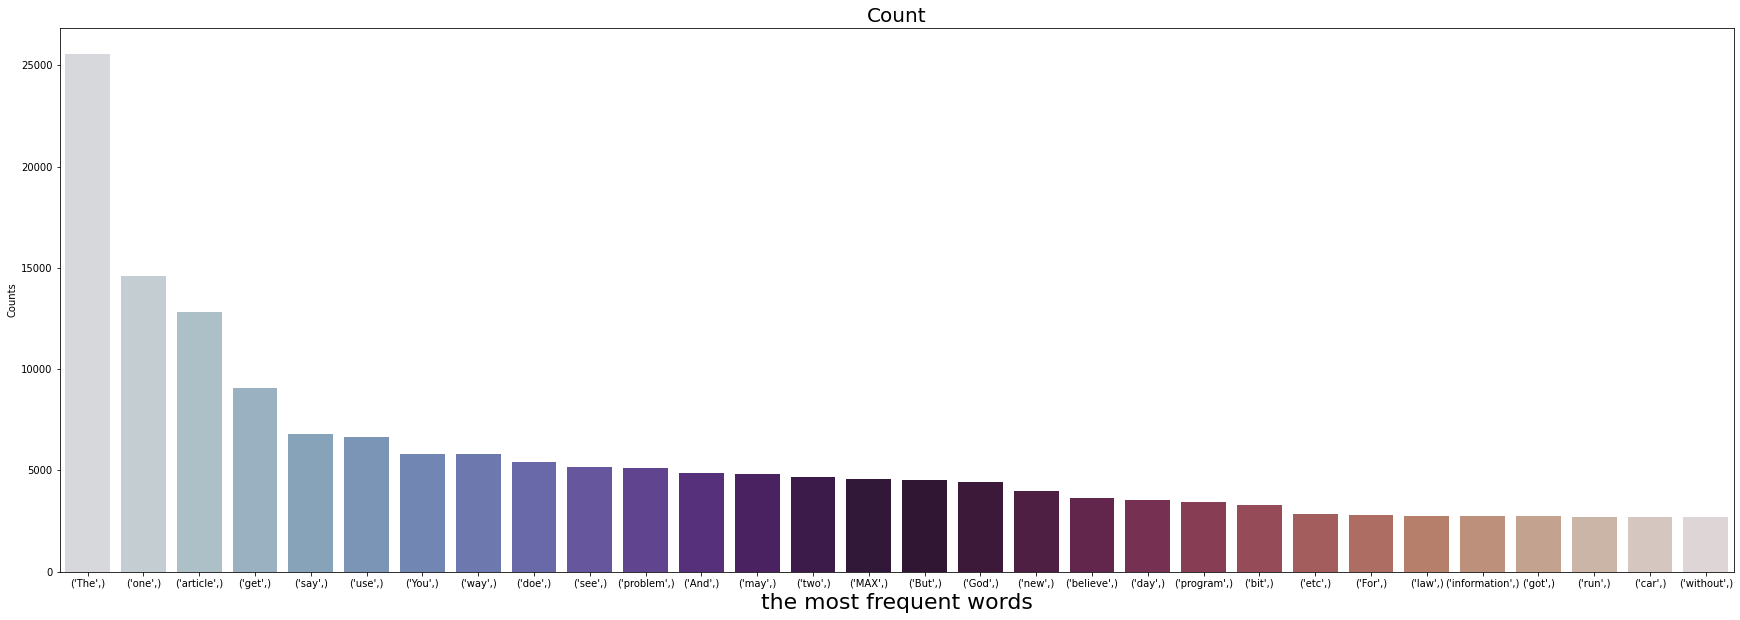

In [209]:
# plot the most frequent words in all the news
df=pd.DataFrame(size_word(clean_tokens))
data = pd.Series(df.value_counts()[:30])
df=pd.DataFrame(data.items(), columns=['Words', 'Counts'])
df.sort_values(by='Counts', axis=0, ascending=False)
fig=plt.figure(figsize=(30,10))
x_axis =  df['Words']
y_axis =  df['Counts']
sns.barplot(x=x_axis,y=y_axis,data=df,palette='twilight')
plt.xlabel("the most frequent words",fontsize=22)
plt.title("Count",fontsize=20)

In [210]:
df = pd.DataFrame({'text': texts,'category': labels})
df

,text,category
0,Archive name atheism resources Alt atheism arc...,0
1,Archive name atheism introduction Alt atheism ...,0
2,In article Charley Wingate writes Well John ha...,0
3,until kings become philosophers or philosophe...,0
4,In article Bob McGwier writes HOWEVER hate eco...,0
...,...,...
19992,In article mathew writes By which mean are you...,19
19993,In article Peter Lamb writes John King writes ...,19
19994,In article Bill Jefferys writes If you would l...,19
19995,In article Gerry Palo The danger of anti cult ...,19


In [211]:
def cat_counter(df_tok):
    """
    Counter of most frequent words based on category. 
    Sorted by category already. 
    """
    cache = []  # {}

    # def inner_(cat): 
    #     counter = Counter()
    #     temp_np = df_tok[df_tok.category == cat].text.to_numpy()
    #     for sentence in temp_np: counter += Counter(sentence)
    #     cache[cat] = counter
    #     del counter, temp_np, sentence

    # _ = joblib.Parallel(n_jobs=os.cpu_count(), prefer="threads")(
    #     joblib.delayed(inner_)(cat)
    #     for cat in tqdm(range(20))
    # )

    for cat in tqdm(range(20)):  # sorted
        counter = Counter()
        temp_np = df_tok[df_tok.category == cat].text.to_numpy()
        for sentence in temp_np: counter += Counter(sentence)
        # cache[cat] = counter
        cache.append(counter)
        del counter, temp_np, sentence
    gc.collect()
    return cache

In [212]:
from sklearn.feature_extraction import _stop_words
STOPWORDS = _stop_words.ENGLISH_STOP_WORDS

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [213]:
def ngram_counter(df, n_gram):
    """
    counter of ngram words based on `generate_ngrams`. 

    :df: (pandas.DataFrame) Original dataframe. NOT tokenized by fastai. 
    :n_gram: What types of n-gram wanted? 

    :return: n_grams for each category
    """
    cache = []

    for cat in tqdm(range(20)):  # sorted
        counter = defaultdict(int)
        temp_np = df[df.category == cat].text.to_numpy()
        for text in temp_np:
            for word in generate_ngrams(text, n_gram=n_gram): 
                counter[word] += 1
        cache.append(Counter(counter))
        del counter, temp_np, text
    gc.collect()
    return cache

In [215]:
def n_gram_by_category(n_grams, k=10, return_val=False):
    """
    :n_grams: (list) containing list of Counters for each category. 
    :k: (int) Top k n-grams displayed. Defaults: 10. 
    :return_val: (bool) Whether to return result or not. Default: False. 

    :caveat: Doesn't display frequency. 
    """
    # +50 to replace the ones in the line marked **. Have caveats. 
    # only works as long as you don't exhaust the below. 
    top_k = [counter.most_common(k) for counter in n_grams]
    top_k = [np.array([list(word) for word in counter])
                for counter in top_k]
    for i in range(len(top_k)): 
        a = top_k[i][:, 0]
        top_k[i] = [i] + list(a)

    print(tabulate(top_k,headers=["category", *range(k)], tablefmt='simple'))

    if return_val: return top_k

In [216]:
unigrams = ngram_counter(df, 1)
n_gram_by_category(unigrams, 5)

  0%|          | 0/20 [00:00<?, ?it/s]

  category  0       1           2           3        4
----------  ------  ----------  ----------  -------  ------
         0  writes  god         article     people   don
         1  image   graphics    jpeg        file     bit
         2  ax      m           q           max      p
         3  drive   scsi        card        mb       ide
         4  mac     apple       know        writes   drive
         5  x       window      use         r        file
         6  new     sale        shipping    offer    mail
         7  car     writes      article     cars     like
         8  writes  bike        article     dod      like
         9  writes  year        article     game     don
        10  game    team        hockey      writes   play
        11  key     encryption  government  chip     writes
        12  writes  use         article     know     like
        13  writes  article     like        don      know
        14  space   writes      article     like     just
        15  god    

In [217]:
bigrams = ngram_counter(df, 2)
n_gram_by_category(bigrams, 5)

  0%|          | 0/20 [00:00<?, ?it/s]

  category  0                  1                  2                   3                 4
----------  -----------------  -----------------  ------------------  ----------------  -------------------
         0  writes article     frank dwyer        don know            alt atheism       don think
         1  image processing   computer graphics  comp graphics       edu pub           thanks advance
         2  ax ax              max ax             ax max              q q               u u
         3  hard drive         hard disk          local bus           thanks advance    x x
         4  does know          don know           hard drive          comp sys          hard disk
         5  x x                dos dos            window manager      o o               mit edu
         6  best offer         make offer         brand new           ghost rider       excellent condition
         7  writes article     don know           rec autos           article writes    new car
         8  writes 

In [218]:
trigrams = ngram_counter(df, 3)
n_gram_by_category(trigrams, 5)

  0%|          | 0/20 [00:00<?, ?it/s]

  category  0                                 1                        2                         3                          4
----------  --------------------------------  -----------------------  ------------------------  -------------------------  -----------------------------------
         0  frank dwyer writes                jon livesey writes       dwyer writes article      frank dwyer hatching       dwyer hatching hens
         1  available anonymous ftp           wuarchive wustl edu      lcs mit edu               o o o                      export lcs mit
         2  ax ax ax                          max ax ax                ax ax max                 ax max ax                  q q q
         3  comp os os                        floppy disk drives       st st st                  hard disk drives           hard disk controller
         4  comp sys mac                      deluxe b s               b s microframe            s microframe best          microframe best price
         5